One-way ANOVA results:
F-statistic: 3.067
p-value: 0.05162


<Figure size 800x600 with 0 Axes>

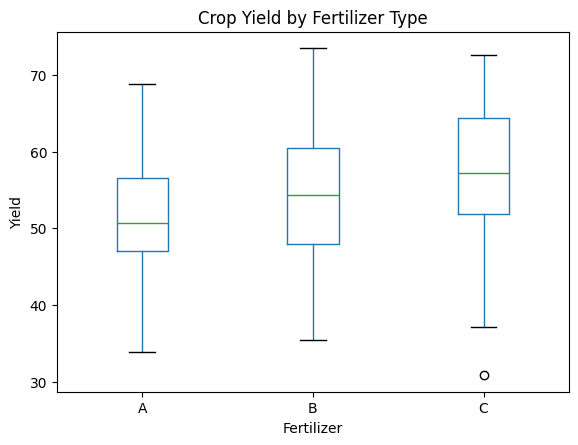

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


# Set random seed for reproducibility
np.random.seed(42)


# Simulate yields for 3 fertilizer groups
# You can change mean and variance here to demonstrate differences
yield_A = np.random.normal(loc=53, scale=10, size=30) # Fertilizer A: mean=50, std=5
yield_B = np.random.normal(loc=55, scale=10, size=30) # Fertilizer B: mean=55, std=7
yield_C = np.random.normal(loc=57, scale=10, size=30) # Fertilizer C: mean=60, std=6


# Create a DataFrame for clarity
df = pd.DataFrame({
'Yield': np.concatenate([yield_A, yield_B, yield_C]),
'Fertilizer': ['A']*30 + ['B']*30 + ['C']*30
})


# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(yield_A, yield_B, yield_C)


print("One-way ANOVA results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.5f}")


# Visualization: Boxplot for each fertilizer
plt.figure(figsize=(8, 6))
df.boxplot(column='Yield', by='Fertilizer', grid=False)
plt.title("Crop Yield by Fertilizer Type")
plt.suptitle("") # Removes automatic title
plt.ylabel("Yield")
plt.show()

One-way ANOVA results:
F-statistic: 3.067
p-value: 0.05162


<Figure size 800x600 with 0 Axes>

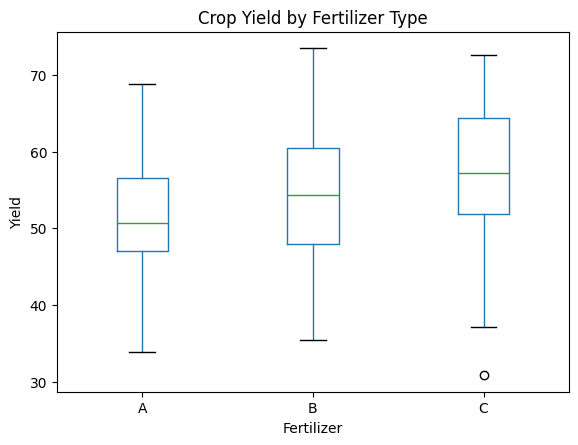

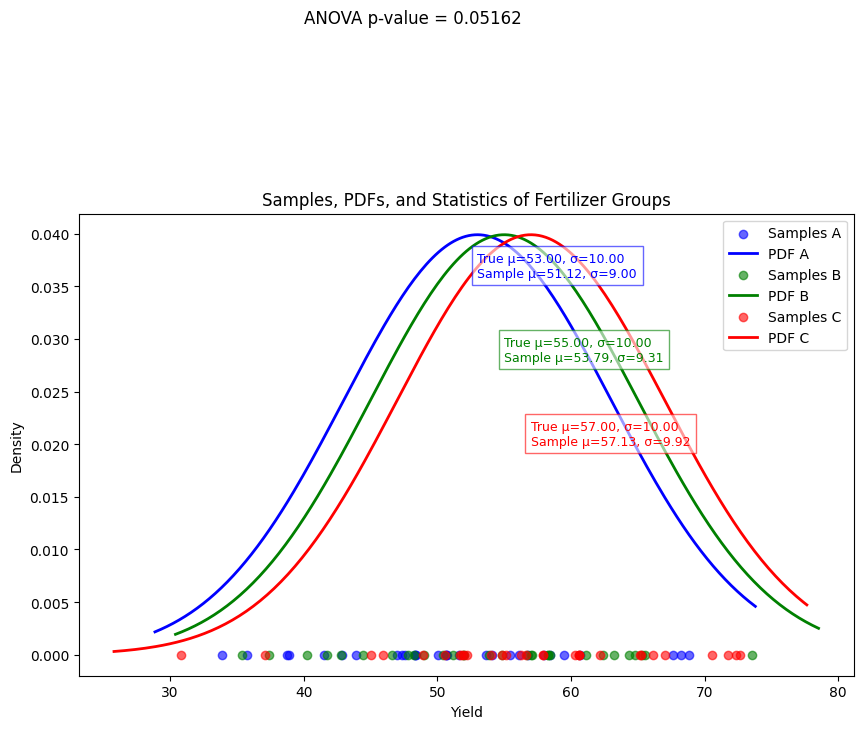

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


# Set random seed for reproducibility
np.random.seed(42)


# Simulate yields for 3 fertilizer groups
# You can change mean and variance here to demonstrate differences
yield_A = np.random.normal(loc=53, scale=10, size=30) # Fertilizer A: mean=50, std=5
yield_B = np.random.normal(loc=55, scale=10, size=30) # Fertilizer B: mean=55, std=7
yield_C = np.random.normal(loc=57, scale=10, size=30) # Fertilizer C: mean=60, std=6


# True (defined) parameters
true_params = {
"A": (53, 10),
"B": (55, 10),
"C": (57, 10)
}


# Create a DataFrame for clarity
df = pd.DataFrame({
'Yield': np.concatenate([yield_A, yield_B, yield_C]),
'Fertilizer': ['A']*30 + ['B']*30 + ['C']*30
})


# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(yield_A, yield_B, yield_C)


print("One-way ANOVA results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.5f}")


# Visualization: Boxplot for each fertilizer
plt.figure(figsize=(8, 6))
df.boxplot(column='Yield', by='Fertilizer', grid=False)
plt.title("Crop Yield by Fertilizer Type")
plt.suptitle("") # Removes automatic title
plt.ylabel("Yield")
plt.show()


# --- Additional Section: Plot sample points and PDFs with stats ---


# Function to plot samples and PDF
def plot_samples_and_pdf(samples, true_mean, true_std, label, color, y_offset):
  x = np.linspace(min(samples) - 5, max(samples) + 5, 200)
  pdf = stats.norm.pdf(x, true_mean, true_std)


  plt.scatter(samples, np.zeros_like(samples), alpha=0.6, label=f"Samples {label}", color=color)
  plt.plot(x, pdf, color=color, linewidth=2, label=f"PDF {label}")


  # Sample statistics
  sample_mean = np.mean(samples)
  sample_std = np.std(samples, ddof=1)


  # Annotate both true and sample stats with vertical offset to avoid overlap
  plt.text(true_mean, max(pdf)*y_offset,
  f"True μ={true_mean:.2f}, σ={true_std:.2f}\nSample μ={sample_mean:.2f}, σ={sample_std:.2f}",
  color=color, fontsize=9, bbox=dict(facecolor='white', alpha=0.6, edgecolor=color))


plt.figure(figsize=(10, 6))
plot_samples_and_pdf(yield_A, *true_params["A"], label="A", color="blue", y_offset=0.9)
plot_samples_and_pdf(yield_B, *true_params["B"], label="B", color="green", y_offset=0.7)
plot_samples_and_pdf(yield_C, *true_params["C"], label="C", color="red", y_offset=0.5)


# Add ANOVA p-value annotation
plt.title("Samples, PDFs, and Statistics of Fertilizer Groups")
plt.xlabel("Yield")
plt.ylabel("Density")
plt.legend()
plt.text(40, 0.06, f"ANOVA p-value = {p_value:.5f}", fontsize=12, color="black")
plt.show()